#import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

#load data_set

In [ ]:
data=pd.read_csv('//content/customer_churn_dataset-training-master.csv')
print(data.head(10).to_string())

   CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  Payment Delay Subscription Type Contract Length  Total Spend  Last Interaction  Churn
0         2.0  30.0  Female    39.0             14.0            5.0           18.0          Standard          Annual        932.0              17.0    1.0
1         3.0  65.0  Female    49.0              1.0           10.0            8.0             Basic         Monthly        557.0               6.0    1.0
2         4.0  55.0  Female    14.0              4.0            6.0           18.0             Basic       Quarterly        185.0               3.0    1.0
3         5.0  58.0    Male    38.0             21.0            7.0            7.0          Standard         Monthly        396.0              29.0    1.0
4         6.0  23.0    Male    32.0             20.0            5.0            8.0             Basic         Monthly        617.0              20.0    1.0
5         8.0  51.0    Male    33.0             25.0            9.0   

#Remove unwanted-colm

In [ ]:
data.drop(['CustomerID'], axis=1, inplace=True)
print(data.head(10).to_string())


    Age  Gender  Tenure  Usage Frequency  Support Calls  Payment Delay Subscription Type Contract Length  Total Spend  Last Interaction  Churn
0  30.0  Female    39.0             14.0            5.0           18.0          Standard          Annual        932.0              17.0    1.0
1  65.0  Female    49.0              1.0           10.0            8.0             Basic         Monthly        557.0               6.0    1.0
2  55.0  Female    14.0              4.0            6.0           18.0             Basic       Quarterly        185.0               3.0    1.0
3  58.0    Male    38.0             21.0            7.0            7.0          Standard         Monthly        396.0              29.0    1.0
4  23.0    Male    32.0             20.0            5.0            8.0             Basic         Monthly        617.0              20.0    1.0
5  51.0    Male    33.0             25.0            9.0           26.0           Premium          Annual        129.0               8.0    1.0

In [ ]:
print(data["Contract Length"].unique())
print(data["Contract Length"].dtype)


['Annual' 'Monthly' 'Quarterly' nan]
object


#check which features have nan data

In [ ]:

#check which features have nan data
data.isnull().sum()

,0
Age,1
Gender,1
Tenure,1
Usage Frequency,1
Support Calls,1
Payment Delay,1
Subscription Type,1
Contract Length,1
Total Spend,1
Last Interaction,1


#checking for data imbalance

In [ ]:
#checking for data imbalance      # final outcome data is not imbalance
print(data["Churn"].value_counts())
data["Churn"].value_counts(normalize=True) * 100


Churn
1.0    249999
0.0    190833
Name: count, dtype: int64


,proportion
Churn,
1.0,56.71072
0.0,43.28928


#encoding categorical value

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Contract Length (categorical + ordered)
data["Contract Length"] = data["Contract Length"].fillna(
    data["Contract Length"].mode()[0]
)

# Gender
data["Gender"] = data["Gender"].fillna(
    data["Gender"].mode()[0]
)

# Subscription Type
data["Subscription Type"] = data["Subscription Type"].fillna(
    data["Subscription Type"].mode()[0]
)

# -------------------------------
# 2. Label Encoding (RF friendly)
# -------------------------------

le_gender = LabelEncoder()
data["Gender"] = le_gender.fit_transform(data["Gender"])

le_sub = LabelEncoder()
data["Subscription Type"] = le_sub.fit_transform(data["Subscription Type"])

# -------------------------------
# 3. Ordinal Encoding (MANUAL → safest)
# -------------------------------

contract_map = {
    "Monthly": 0,
    "Quarterly": 1,
    "Annual": 2
}

data["Contract Length"] = data["Contract Length"].map(contract_map)

# -------------------------------
# 4. Final verification
# -------------------------------

print(data[["Gender", "Subscription Type", "Contract Length"]].head())
print("\nData types:\n")
print(data.dtypes)


   Gender  Subscription Type  Contract Length
0       0                  2                2
1       0                  0                0
2       0                  0                1
3       1                  2                0
4       1                  0                0

Data types:

Age                  float64
Gender                 int64
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type      int64
Contract Length        int64
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object


#filling NAN value with the help of median

In [ ]:
#filling NAN value with the help of median
num_cols = data.select_dtypes(include=["float64", "int64"]).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].median())

data.isnull().sum()

,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0
Last Interaction,0


#visualization of data

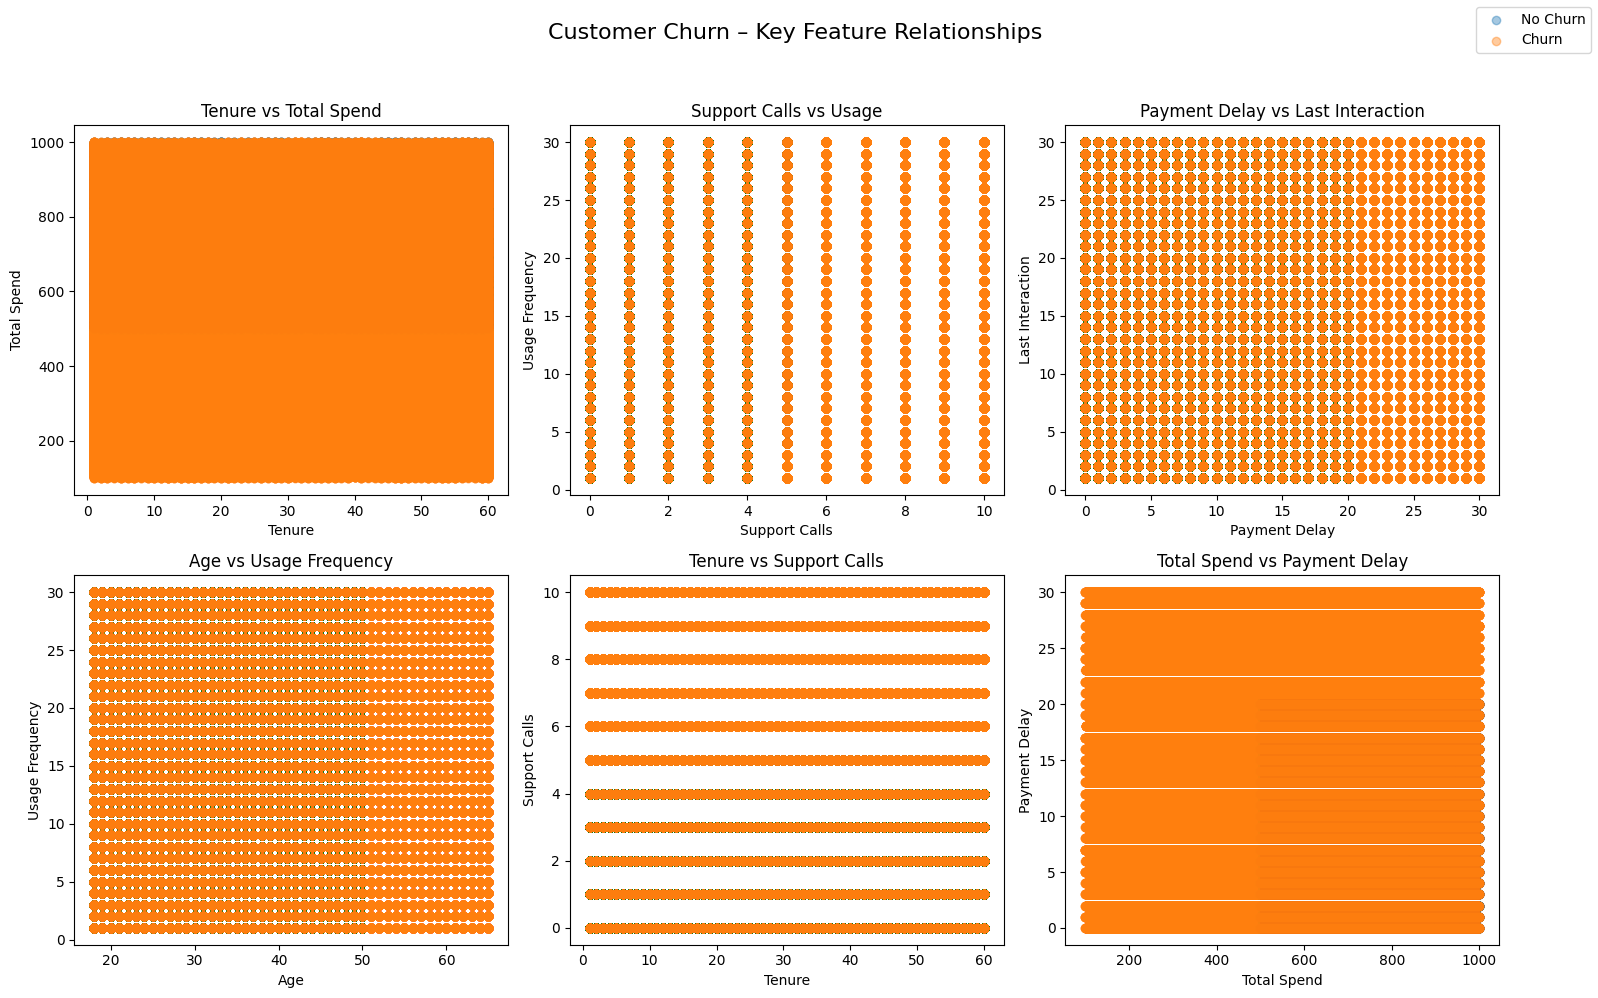

In [ ]:
import matplotlib.pyplot as plt

# split data by churn
churn_0 = data[data["Churn"] == 0]
churn_1 = data[data["Churn"] == 1]

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle("Customer Churn – Key Feature Relationships", fontsize=16)

# 1️⃣ Tenure vs Total Spend
axes[0, 0].scatter(churn_0["Tenure"], churn_0["Total Spend"], alpha=0.4, label="No Churn")
axes[0, 0].scatter(churn_1["Tenure"], churn_1["Total Spend"], alpha=0.4, label="Churn")
axes[0, 0].set_title("Tenure vs Total Spend")
axes[0, 0].set_xlabel("Tenure")
axes[0, 0].set_ylabel("Total Spend")

# 2️⃣ Support Calls vs Usage Frequency
axes[0, 1].scatter(churn_0["Support Calls"], churn_0["Usage Frequency"], alpha=0.4)
axes[0, 1].scatter(churn_1["Support Calls"], churn_1["Usage Frequency"], alpha=0.4)
axes[0, 1].set_title("Support Calls vs Usage")
axes[0, 1].set_xlabel("Support Calls")
axes[0, 1].set_ylabel("Usage Frequency")

# 3️⃣ Payment Delay vs Last Interaction
axes[0, 2].scatter(churn_0["Payment Delay"], churn_0["Last Interaction"], alpha=0.4)
axes[0, 2].scatter(churn_1["Payment Delay"], churn_1["Last Interaction"], alpha=0.4)
axes[0, 2].set_title("Payment Delay vs Last Interaction")
axes[0, 2].set_xlabel("Payment Delay")
axes[0, 2].set_ylabel("Last Interaction")

# 4️⃣ Age vs Usage Frequency
axes[1, 0].scatter(churn_0["Age"], churn_0["Usage Frequency"], alpha=0.4)
axes[1, 0].scatter(churn_1["Age"], churn_1["Usage Frequency"], alpha=0.4)
axes[1, 0].set_title("Age vs Usage Frequency")
axes[1, 0].set_xlabel("Age")
axes[1, 0].set_ylabel("Usage Frequency")

# 5️⃣ Tenure vs Support Calls
axes[1, 1].scatter(churn_0["Tenure"], churn_0["Support Calls"], alpha=0.4)
axes[1, 1].scatter(churn_1["Tenure"], churn_1["Support Calls"], alpha=0.4)
axes[1, 1].set_title("Tenure vs Support Calls")
axes[1, 1].set_xlabel("Tenure")
axes[1, 1].set_ylabel("Support Calls")

# 6️⃣ Total Spend vs Payment Delay
axes[1, 2].scatter(churn_0["Total Spend"], churn_0["Payment Delay"], alpha=0.4)
axes[1, 2].scatter(churn_1["Total Spend"], churn_1["Payment Delay"], alpha=0.4)
axes[1, 2].set_title("Total Spend vs Payment Delay")
axes[1, 2].set_xlabel("Total Spend")
axes[1, 2].set_ylabel("Payment Delay")

# single legend for whole figure
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right")

plt.tight_layout(rect=[0, 0, 0.95, 0.95])
plt.show()


#seperate features and Target value

In [ ]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]




In [ ]:
y

,Churn
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
440828,0.0
440829,0.0
440830,0.0
440831,0.0


#train test and split data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#model-selection

In [ ]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [ ]:
acurracy=accuracy_score(y_test,y_pred)
print(acurracy)

0.9998865788787188


In [ ]:
mse= mean_squared_error(y_test,y_pred)
print("Mean sqaure error :",mse)

Mean sqaure error : 0.00011342112128120499


#metrices

In [ ]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix:\n\n",cm)
print("\nprecision ",precision)
print("\nrecall ",recall)
print("\nf1_score",f1)

confusion matrix:

 [[38142     1]
 [    9 50015]]

precision  0.9999800063979527

recall  0.9998200863585479

f1_score 0.9999000399840065


#roc-curve

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc=roc_auc_score(y_test,y_pred)
print("roc-auc",roc_auc)

roc-auc 0.9998969346141375


#plot roc curve in graph

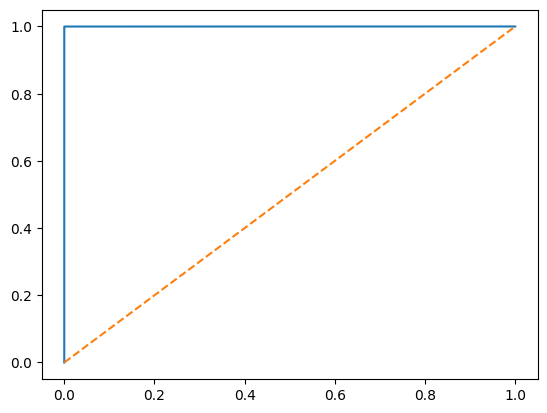

In [ ]:

#plot roc curve in graph
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle='--')

#hyperparameter use in randomforest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

In [ ]:
rf = RandomForestClassifier(n_estimators=5,random_state=42)

In [ ]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

#            randomized search for
# param_grid = {
#     "n_estimators": randint(100, 500),
#     "max_depth": [None] + list(range(2, 15)),
#     "min_samples_split": randint(2, 15),
#     "min_samples_leaf": randint(1, 10),
#     "criterion": ["gini", "entropy"]
# }

In [ ]:
# -------------------------------
# Grid Search
# -------------------------------
grid1 = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring="f1",     # better than accuracy for churn
    n_jobs=-1
)

In [ ]:
grid1.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=5, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1')

In [ ]:
#accuracy
accuracy1 = grid1.score(x_test, y_test)
print(f"Accuracy: {accuracy1}")

Accuracy: 0.9995900450950396


In [ ]:
print(grid1.best_params_)
print(grid1.best_score_)
print(grid1.best_estimator_)
print(grid1.best_index_)
print(grid1.scorer_)

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.9996423340115863
RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=42)
153
make_scorer(f1_score, response_method='predict', average=binary)


#accuracy